<a href="https://colab.research.google.com/github/Juanpa06/Teoria-de-comunicacion-y-procesamiento-de-senales/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab/Proyecto #2

###Estudiantes:


*   Juan Pablo Jiménez Anderson 
*   Gabriel Blanco Mora         
*   Kevin Chinchilla Gómez      



##Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq


##Tarea 1

### Sistema de comunicación AM de tipo DSC-SC


Se generará un sistema de modulación y demodulación AM de tipo DSC-SC. Este sistema será ideal lo cual quiere decir que no se consideran pérdidas energéticas y además que se da sincronización coherente, es decir el oscilador de la portadora y el oscilador local tienen señales identicas. A continuación se muestra el esquemático del sistema, con el nombre respectivo de cada señal.
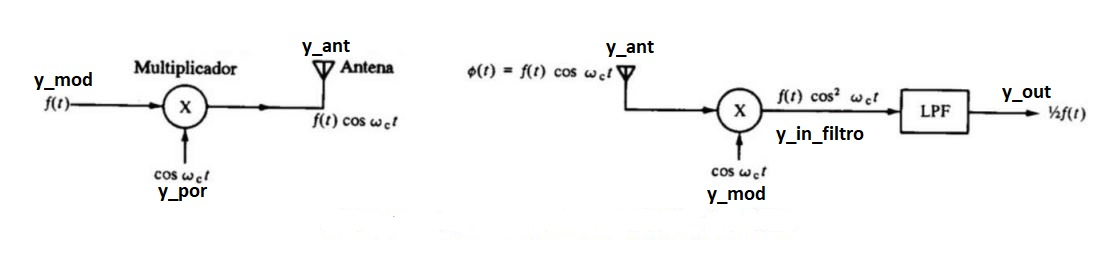


### Declaración de variables de muestreo
Como todas las señales se trabajan de manera discreta, tanto en el dominio del tiempo como en el de la frecuencia, se definen primeramente la frecuencia de muestreo, el intervalo de tiempo total y la cantidad de muestras de cada señal

In [ ]:
fs=171888 #Frecuencia de muestreo
T=np.pi/54 #Tiempo total en el que se graficaran las se;ales
n=int(T*fs) #Numero de muestras totales
print(n)


10000


### Proceso de modulación

La primera función genera y grafica las entradas del transmisor de señal. Estas son y_mod, que corresponde al mensaje o la información, y_por, la señal portadora que posee una frecuencia elevada, y y_ant que es la señal modulada y resulta de multiplicar y_ant y y_mod. La función fue configurada para que la frecuencia de la portadora sea modificable por el usuario, se recomienda que esta sea mayor a 1KHz para que el proceso final de filtrado sea exitoso.

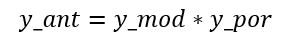

#### Señales en el dominio del tiempo

In [ ]:
#Función moduladora, recibe como parámetro la frecuencia de la señal portadora 
def modulacion(frec_por):
  x=np.linspace(0,T,n,endpoint=True)                                            #Muestras de tiempo
  y_mod=np.sin(2*np.pi*120*x)                                                   #Señal moduladora
  y_por=np.sin(2*np.pi*frec_por*x)                                              #Señal de la portadora, utiliza parametro de entrada de la función
  y_ant=np.multiply(y_por,y_mod)                                                #Señal modulada que es enviada por la antena
  f = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
  f.set_figwidth(24)
  f.set_figheight(5)
  figure, axis = plt.subplots(3, 1,figsize=(24,15))
  axis[0].plot(x, y_mod)
  axis[0].set_title("Señal moduladora")
  axis[1].plot(x, y_por)
  axis[1].set_title("Señal portadora")
  axis[2].plot(x, y_ant)
  axis[2].set_title("Señal modulada")
  plt.show()
  return(y_ant,y_por,y_mod,frec_por)

#-------------------------------------------------------AQUI SE LLAMA A LA FUNCION MODULACION Y SE DETERMINA LA FRECUENCIA DE LA PORTADORA-----------------------------------
y_ant,y_por,y_mod,frec_por=modulacion(4000)

#### Señales en el dominio de la frecuencia

Se aplica la transofrmada de Laplace discreta a las señales obtenidas anteriormente para observar su comportamiento en el dominio de la frecuecia. Se puede observar como la moduladora y la portadora  presentan un impulso en sus frecuencias y como, los impulsos de la y_ant se dan en la frecuencia de la portadora +- la frecuencia de la moduladora, en este caso +-120Hz, esto se debe a que una multiplicación de dos señales en el tiempo corresponde en el dominio de la frecuencia a una convolución.

In [ ]:
#Transformadas de Fourier para modulación
def transfourier_mod(y_mod, y_por, y_ant):
  #Transformada de Fourier para la señal banda base (moduladora)(información)
  n_mod=70
  t = np.linspace(0,T,n_mod)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_mod_FFT = fft(y_mod)

  plt.plot(f[:n_mod//2], np.abs(y_mod_FFT[:n_mod//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{mod}$|', fontsize=20)
  plt.show()

  #Transformada de Fourier para la señal portadora
  n_por = int(frec_por/6.5)
  t = np.linspace(0,T,n_por)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_por_FFT = fft(y_por)

  plt.plot(f[:n_por//2], np.abs(y_por_FFT[:n_por//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{port}$|', fontsize=20)
  plt.show()

  #Transformada de Fourier para la señal modulada
  n_ant = n_por
  t = np.linspace(0,T,n_ant)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_ant_FFT = fft(y_ant)

  plt.plot(f[:n_ant//2], np.abs(y_ant_FFT[:n_ant//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{ant}$|', fontsize=20)
  plt.show()

transfourier_mod(y_mod, y_por, y_ant)

###Proceso de demodulación. 

El proceso de demodulación consiste en básicamente volver a multiplicar la señal recibida, y_ant, por una portadora exactamente igual a la utilizada anteriormente, una cosenoidal con la misma frecuencia, amplitud y sin ningún tipo de desfase. Esta señal, la cual se denomina y_in_filtro posteriormente entra a un Low Pass Filter.

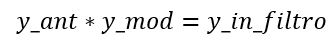

In [ ]:
def demodulacion(y_ant):
  x=np.linspace(0,T,n,endpoint=True)
  y_in_filtro=np.multiply(y_por,y_ant)
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y_in_filtro)
  return(y_in_filtro)

y_in_filtro = demodulacion(y_ant)


#### Proceso final de filtrado
Finalmente, la señal entra en un proceso de filtrado pasa bajas. Para esto se implementó un filtro de segundo orden tipo butter con una frecuencia de corte fija de 250Hz. Entre más se acerque esta frecuencia de filtrado a la frecuencia de la portadora, con más ruido se verá la señal, por esta razón se sugiere que esta frecuencia nunca sea menor a 1kHz. Es importante mencionar que la señal final obtenida, está atenuada con respecto a la original, pero a parte de esto, es completamente identica. La disminución en la amplitud se debe a las propiedades del filtro implementado. 

In [ ]:
cutoff=250 #Frecuencia de corte del filtro 
order=2

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
butter_lowpass(500,fs)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

b, a = butter_lowpass(cutoff, fs, order)

#y = butter_lowpass_filter(y_ant, cutoff, fs, order)
y = butter_lowpass_filter(y_in_filtro, cutoff, fs, order)
x=np.linspace(0,T,n,endpoint=False)

plt.subplot(2, 1, 2)
#plt.plot(x, y_ant, 'b-', label='data')
plt.plot(x, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

Finalmente se muestran las señales de entrada y salida al filtro en el dominio de la frecuencia. La de salida del filtro corresponde también a la salida del sistema. Se observa como para la señal filtrada ya no hay componentes de frecuencia alta como en la señal de entrada del filtro.

In [ ]:
#Transformadas de Fourier para demodulación
def transfourier_demod(y_in_filtro, y):
  #Transformada de Fourier para la señal demodulada
  n_demod=1000
  t = np.linspace(0,T,n_demod)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_in_filtro_FFT = fft(y_in_filtro)

  plt.plot(f[:n_demod//2], np.abs(y_in_filtro_FFT[:n_demod//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{infiltro}$|', fontsize=20)
  plt.show()

  #Transformada de Fourier para la señal filtrada
  n_filtrada = n_demod
  t = np.linspace(0,T,n_filtrada)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_filtrada_FFT = fft(y)

  plt.plot(f[:n_filtrada//2], np.abs(y_filtrada_FFT[:n_filtrada//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{filtrada}$|', fontsize=20)
  plt.show()

transfourier_demod(y_in_filtro, y)

##Tarea 2

### Etapa de demodulación con señal portadora con errores de frecuencia y fase

Debido a la dificultad de la sincronización de las señales portadoras presentes en la etapa de modulación y de demodulación, se suelen presentar errores en la frecuencia y en la fase de la señal portadora en demodulación en comparación con la señal moduladora de modulación.

#### Creación de la señal portadora con errores

Se define una función que recibe la frecuencia de la señal portadora de modulación y los cambios de frecuencia y fase que se desean simular en la señal portadora de salida. Esto retornando una señal portadora que contempla dichos errores en frecuencia y en fase.

In [ ]:
def señal_portadora2(frec,desfase,frec_por):                                    #Función para crear una señal portadora de demodulación con errores
  x_por2=np.linspace(0,np.pi/54,10000,endpoint=True)                            
  y_por2=np.sin(2*np.pi*(frec_por+frec)*x_por2+desfase)                         #Se crea la señal senoidal considerando los cambios en fase y en frecuencia
  f = plt.figure()                                                              #Se grafica la señal portadora
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x_por2,y_por2)
  plt.show()
  return  (y_por2)

y_por2=señal_portadora2(10,0,frec_por)                                          #Se asigna a y_por2 el valor de la señal portadora de demodulación con errores

#### Etapa de demodulación

Se define una función que recibe la salida de la etapa de modulación realizada en la sección "Tarea 1" y la señal portadora de demodulación. De esta forma se realiza la multiplicación de ambas señales para obtener la señal demodulada, la cuál deberá ser filtrada en etapas posteriores. En la gráfica se puede observar cómo se afecta la señal demodulada, debido a los errores en la señal portadora.

Cabe destacar que los errores por frecuencia generan más problemas en la señal demodulada, por más mínimos que sean. Sin embargo, los errores mínimos en fase en muchas ocasiones pueden ser controlados. Lo anterior puede observarse al ingresar distintas combinaciones de errores en la función "señal_portadora2".

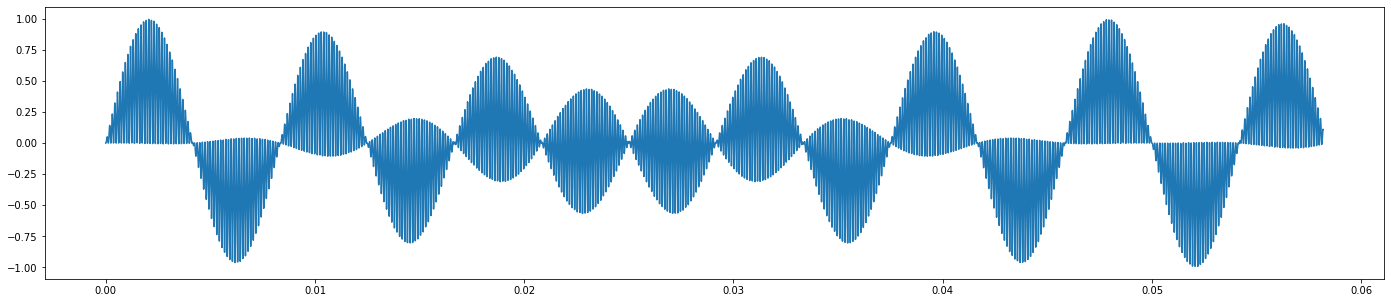

In [ ]:
def demodulacion_2(y_ant,y_por2):                                               #Función que realiza la demodulación de la señal
  x=np.linspace(0,T,n,endpoint=True)
  y_in_filtro2=np.multiply(y_por2,y_ant)                                        #Se multiplican la señal recibida por la etapa de modulación y señal portadora con errores
  f = plt.figure()                                                              #Se grafica la señal demodulada
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y_in_filtro2)
  return(y_in_filtro2)

y_in_filtro2=demodulacion_2(y_ant,y_por2)                                       #Se asigna a y_in_filtro2 el valor de la señal demodulada


#### Filtro paso bajo

Para eliminar las altas frecuencias presentes en la señal demodulada y que a su vez, no pertenecen a la información o mensaje que fue enviado desde un principio, se procede a filtrar la señal demodulada. De esta forma se obtiene la señal moduladora (información) pero con una amplitud reducida a la mitad. Para realizar lo anterior, se utilizó una frecuencia de corte igual a 300, un orden igual a 2, y también se utilizaron las funciones definidas anteriormente en la etapa "Tarea 1"

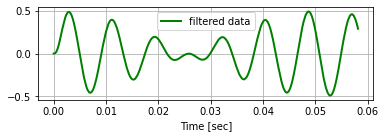

In [ ]:
cutoff=300                                                                      #Frecuencia de corte del filtro 
order=2                                                                         #Orden del filtro

b, a = butter_lowpass(cutoff, fs, order)                                        #Se utiliza la función butter_lowpass y se asignan los valores retornados a "a" y "b"

y2 = butter_lowpass_filter(y_in_filtro2, cutoff, fs, order)                     #Se filtra la señal llamada y_in_filtro2, asignando el resultado a "y2"
x=np.linspace(0,T,n,endpoint=False)

plt.subplot(2, 1, 2)                                                            #Se grafica la señal obtenida y se definen características de la misma gráfica
#plt.plot(x, y_ant, 'b-', label='data')
plt.plot(x, y2, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

#### Transformada de Fourier

Así como se realizó en la sección "Tarea 1", se calculan y grafican las transformadas de Fourier para la señal demodulada, la portadora con errores y la señal filtrada obtenida anteriormente.

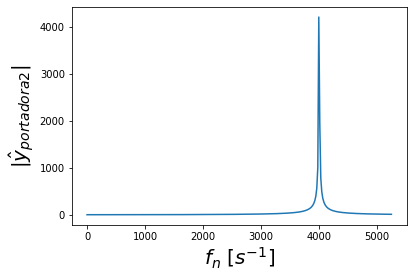

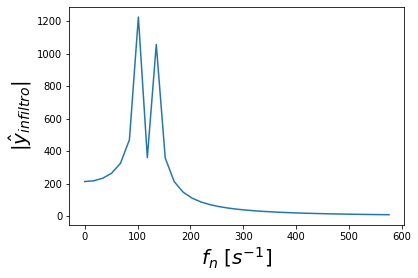

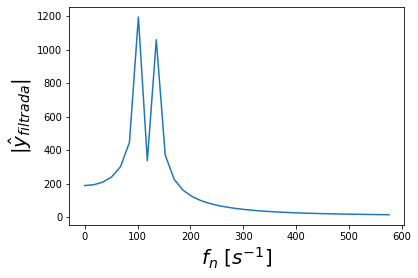

In [ ]:
def transfourier_demod2(y_por2,y_in_filtro2, y2):
  #Transformada de Fourier para la señal demodulada
  n_por2 = int(frec_por/6.5)
  t = np.linspace(0,T,n_por2)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_por2_FFT = fft(y_por2)

  plt.plot(f[:n_por2//2], np.abs(y_por2_FFT[:n_por2//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{portadora2}$|', fontsize=20)
  plt.show()

  #Transformada de Fourier para la señal demodulada con portadora con errores
  n_demod2=70
  t = np.linspace(0,T,n_demod2)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_in_filtro2_FFT = fft(y_in_filtro2)

  plt.plot(f[:n_demod2//2], np.abs(y_in_filtro2_FFT[:n_demod2//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{infiltro}$|', fontsize=20)
  plt.show()

  #Transformada de Fourier para señal filtrada de demodulación con errores
  n_filtrada2 = n_demod2
  t = np.linspace(0,T,n_filtrada2)
  dt = np.diff(t)[0]

  f = fftfreq(len(t), np.diff(t)[0])
  y_filtrada_FFT = fft(y2)

  plt.plot(f[:n_filtrada2//2], np.abs(y_filtrada_FFT[:n_filtrada2//2]))
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{y}_{filtrada}$|', fontsize=20)
  plt.show()

transfourier_demod2(y_por2,y_in_filtro2, y2)

##Tarea 3

###Función generadora de señal

Se crea una función generadora de señales con atributos de entrada:


*   freq: frecuencia de la señal en Hz
*   amp: amplitud de la señal



In [ ]:
def generator(freq, amp):
  T = np.pi/54
  x = np.linspace(-T,T,10000,endpoint=True)                               
  y = amp * np.cos(2*np.pi*freq*x) 

  #Ploteo de la gráfica
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y)
  plt.show()
  return(x, y)


###Función Fourier

Se define una función de manera que sea posible desplegar la transformada de Fourier simétrica con atributos de entrada:
*   signal: variable que contiene la señal
*   inflimit: límite inferior de la gráfica
*   suplimit: límite superior de la gráfica


In [ ]:
def fourier(signal, inflimit, suplimit):
  T = np.pi/54
  n = 10000
  t = np.linspace(-T, T, n)
  dt = np.diff(t, 1) [0]

  f = fftfreq(len(t), dt)
  y_mod_FFT = fft(signal)

 #Ploteo de la gráfica
  plt.plot(f, np.abs(y_mod_FFT))
  plt.xlim([inflimit, suplimit])
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{Y}$|', fontsize=20)
  plt.show()

###Función Modulador

Tal y como se sugiere en el enunciado, se creará una función para que realice el proceso de modulación de la señal, dicho proceso de modulación se describe con el diagrama mostrado a continuación \\

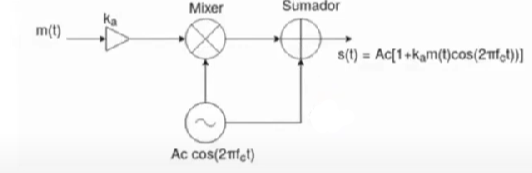

Dado que en escencia este tipo de modulación es sumar a la portadora una modulación DSB-SC, se obtiene que el mensaje modulado está descrito por la función 
$$s(t)=A_c \cdot cos(2 \pi f_c t) + k_a \cdot A_c \cdot m(t) \cdot cos(2 \pi f_c t) $$
Para la definición de la función modulador, se tienen 3 atributos de entrada:
*   m_t: es la señal con la información.
*   c_t: es la señal moduladora o carrier.
*   k_a: es el índice de modulación


In [ ]:

def modulador(m_t, c_t ,k_a):                                                   
  x = np.linspace(0,np.pi/54,10000,endpoint=True) 
  y = k_a * np.multiply(c_t, m_t)
  y = y + c_t
  #y_prev = np.multiply(y_prev, k_a)
  #sum = [y_prev, c_t]
  #y = np.sum(sum)
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y)
  plt.show()
  return (x, y)


###Modulación

####Señal Moduladora

Se define la señal moduladora como una señal de tono cosenoidal con amplitud de 1 y frecuencia de 120 Hz, la misma se observa al ejecutar el código a continuación

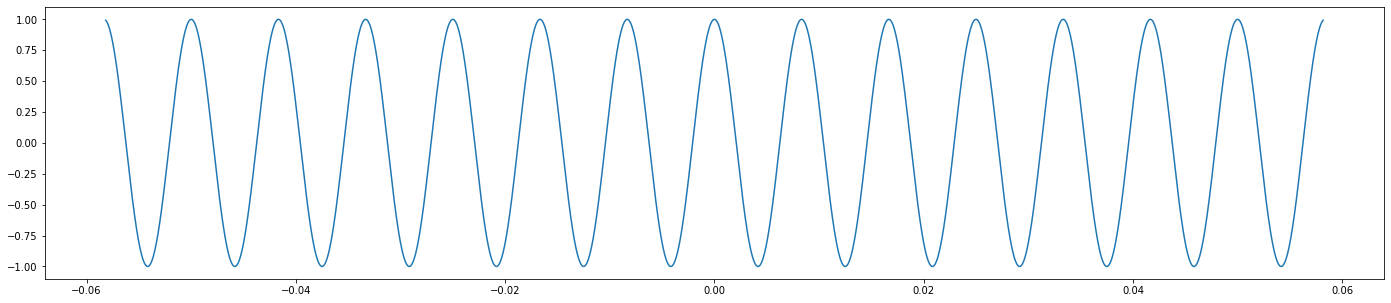

In [ ]:
#m(t)
x_mod,y_mod=generator(120, 1) 

Esta señal tiene como transformada de Fourier:

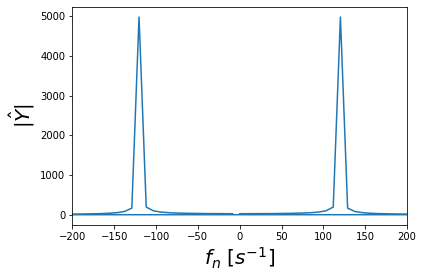

In [ ]:
fourier(y_mod, -200 , 200)

Acá se tiene una gráfica de frecuencia en donde se tienen impulsos en la freciencia de la señal moduladora, a $-120$ $Hz$ y $120$ $Hz$

####Señal portadora o carrier

Una vez obtenida la señal moduladora, quien es el mensaje, se procede con la señal portadora, que se definio como una señal cosenoidal con frecuencia de 5 kHz y amplitud de 1, tal y como se observa en la gráfica generada por el código a continuación

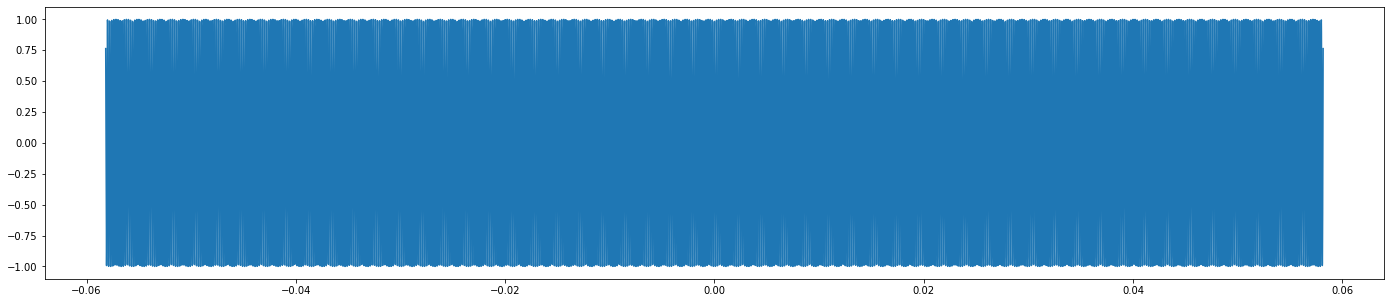

In [ ]:
#c(t)
x_car,y_car = generator(5000, 1) 

Del mismo modo se genera su transformada de fourier, tal y como se observa a continuación:

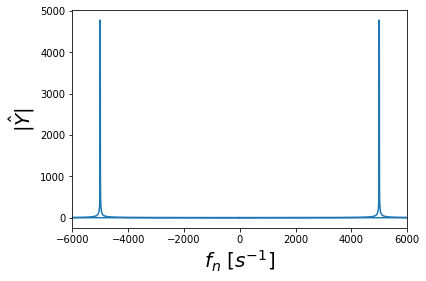

In [ ]:
fourier(y_car, -6000, 6000)

Al igual que para la señal moduladora, se tienen impulsos simétricos en la posición de la frecuencia de esta señal

####Señal modulada

Una vez obtenidas ambas señales, se obtiene la señal producto de la modulación AM DSB-LC, donde se hizo una modulación DSB-SC y se le sumo a esta la señal portadora.

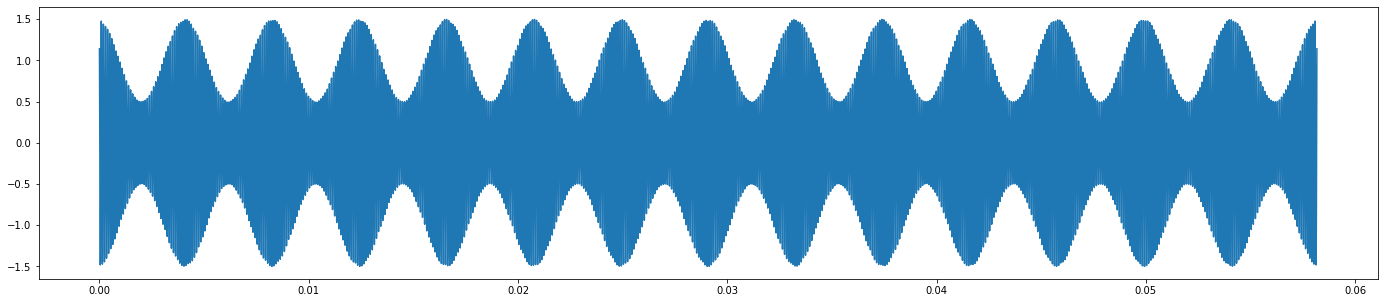

In [ ]:
x, y = modulador(y_mod, y_car, .5)

De la señal anterior se extrae su transformada de fourier:

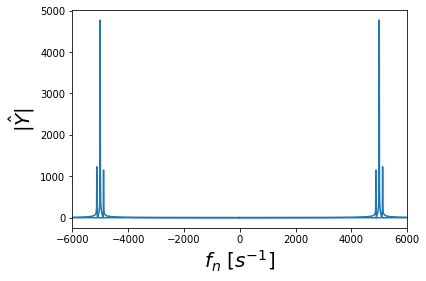

In [ ]:
fourier(y, -6000, 6000)

Para observar de mejor forma dicha transformada, se le hace un aumento a la zona dónde aparece el impulso positivo:

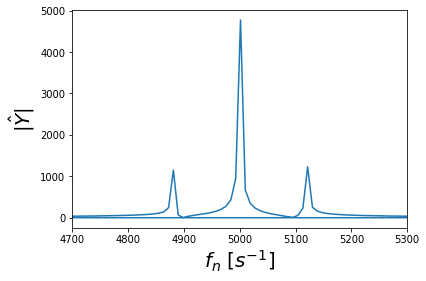

In [ ]:
fourier(y, 4700, 5300)

Al modular la señal, se está haciendo la combinación mediante el mixer y un sumador de las dos señales anteriores, por lo que es esperable ver representadas las frecuencias de ambas señales en la señal $s(t)$, dicha representación se caracteriza por trasladar el cero de la frecuencia de la señal moduladora a la posición de la frecuencia señal portadora, sin embargo, al existir 2 impulsos causados por la señal portadora se da una duplicación de los impulsos de la moduladora, los cuales están separados entre ellops por $2f_m$ y centrados en $f_c$.

####Señal Sobremodulada

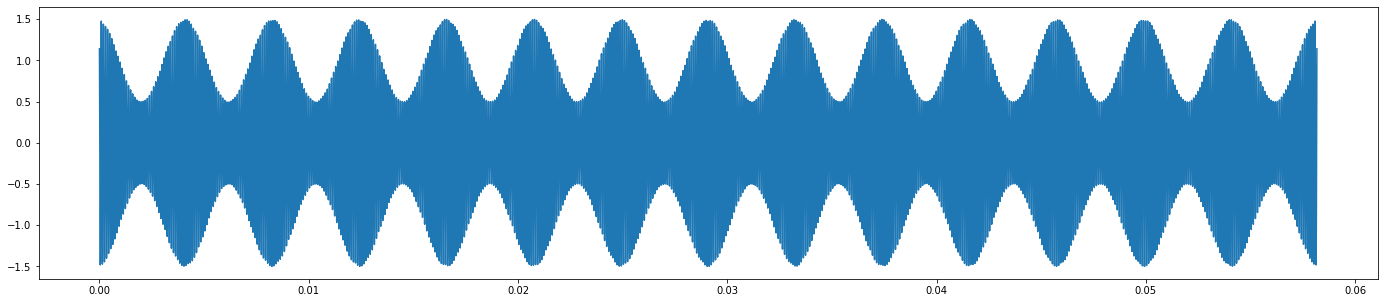

In [ ]:
x, y = modulador(y_mod, y_car, .5)

Según se observa en la gráfica anterior, si se utiliza un índice de modulación $k_a=0.5$ la señal se modula de forma correcta, sin embargo, al cambiar dicho índice por $k_a=3$ se puede observar de forma clara una sobremodulación de la señal, esto se muestra en la gráfica generada por el código a continuación: 

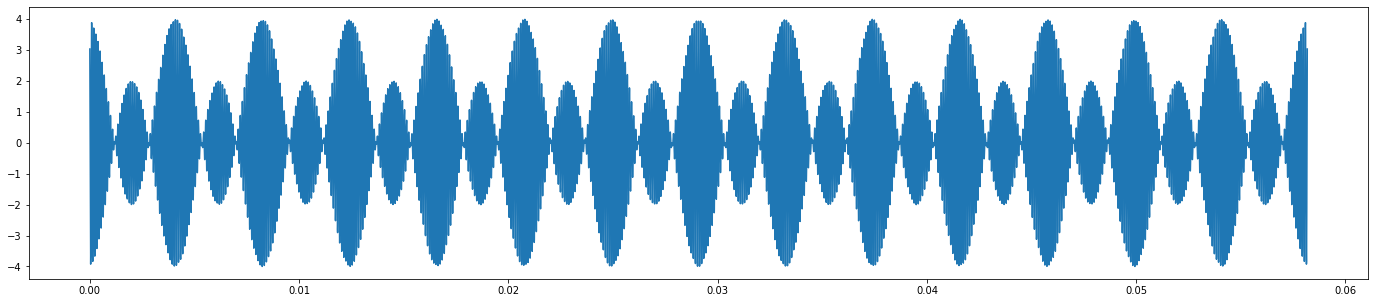

In [ ]:
x_sobre, y_sobre = modulador(y_mod, y_car, 3)

Dado que el enunciado solicita que sí exista sobremodulación, se utiliza la señal de la gráfica enterior, a la cual se le extrae su transformada de fourier:

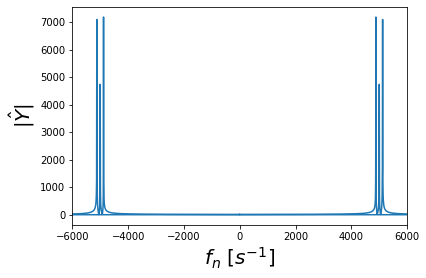

In [ ]:
fourier(y_sobre, -6000, 6000)


Y de igual forma se le hace un aumento para una mejor interpretación

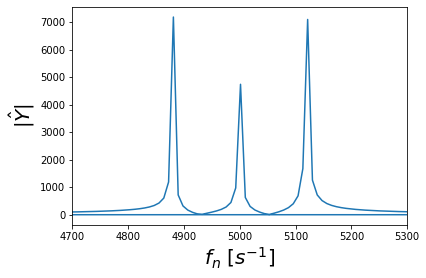

In [ ]:
fourier(y_sobre, 4700, 5300)

Acá se espera que ocurra lo mismo que en el caso de la señal modulada de forma correcta respecto a las posiciones de los impulsos de cada señal, sin embargo, difiere en el hecho que los impulsos cambian sus papeles y los de la señal moduladora son mayores a los impulsos causados por la señal portadora 

####Análisis funcional de la modulación AM DSB-LC


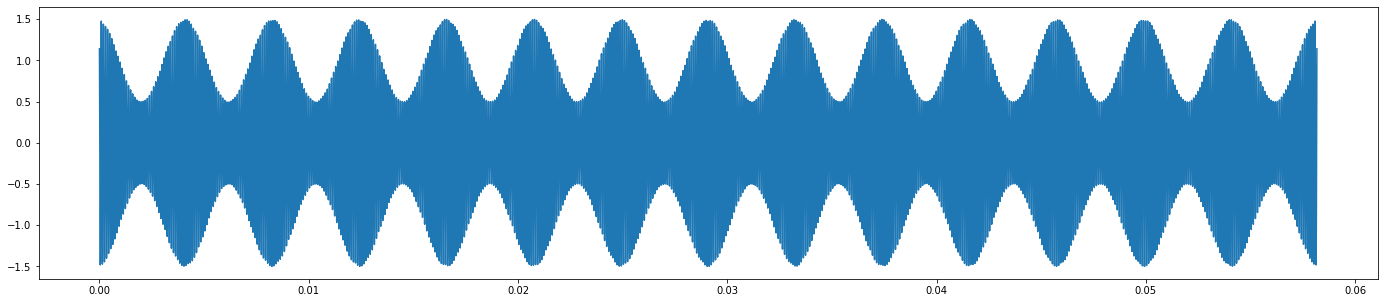

In [ ]:
x, y = modulador(y_mod, y_car, .5)

Se observa que existe una única frecuencia dominante, y 2 frecuencias equidistantes respecto a la frecuencia de la portadora, separadas entre sí $2f_m$, por lo que la distancia de una de esos impulsos al impulso $f_c$ es de $f_m$, si se compara con la teoría, es el comportamiento esperado de una señal con modulación AM DSB-LC, además, la señal no tiene cruces por cero, por ende el demodulador puede hacer una correcta lectura de la envolvente de la señal.

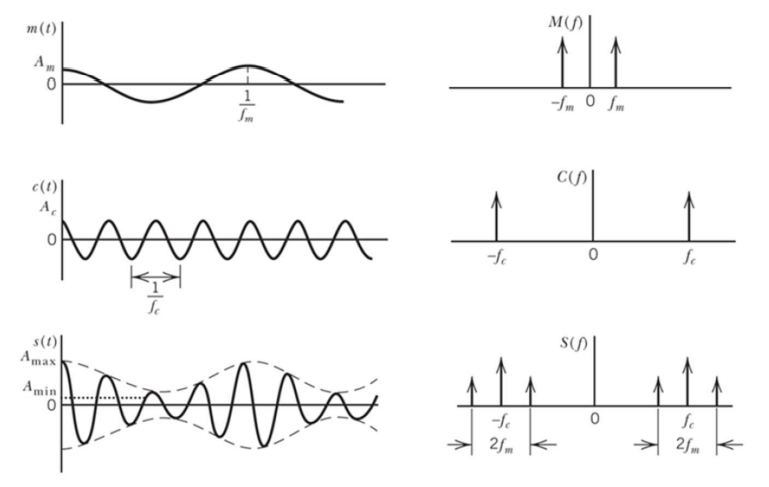

Sin embargo, al hacer la comparación con respecto a una señal sobremodulada, como la que se observa a continuación se invierten los papeles, y ocurren cruces por ceroque al ser interpretados por el receptor para ser demodulados, impedirian dicha demodulación de forma correcta ya que el comportamiento que ocurre no permite el análisis correcto de la señal recibida, si no que se interpretará como subidas, o puede verse como muezcas, en la señal demodulada, por lo que la información transmitida no estaría llegando de manera correcta:

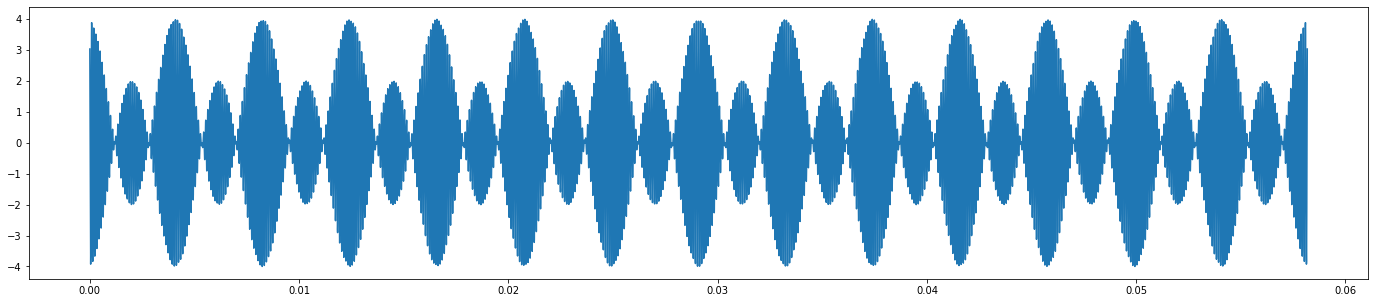

In [ ]:
e, y_sobre = modulador(y_mod, y_car, 3)

###Análisis del factor de modulación $\mu = k_aA_m$

####Función para el analisis de $\mu$
Debido a que se requiere modular muchas señales para obtener el análisis robusto de la modificación factor de modulación se define una función a la cual se le introducen los parámetros:
*   mu: factor de modulación
*   freq: frecuencia del tono de la señal moduladora

Y de ella se despliegan los gráficos de las señales $m(t)$, $c(t)$ y $s(T)$ en el dominio del tiempo y de la señal $S(f)$ de la frecuencia., cabe resaltar que para la señal portadora se utilizará una señal de $5$ $kHz$ y amplitud $1$ en todos los casos

In [ ]:
def factor(mu, freq):
  mod_x, mod_y = generator(freq, 1)
  por_x, por_y = generator(5000, 1)
  x,y = modulador(mod_y, por_y, mu)
  fourier(y, -5000 - freq - 200, 5000 + freq + 200)
  fourier(y, 5000 - freq - 200, 5000 + freq + 200)

####Pruebas de $\mu$

Según indica la teoría, la sobremodulación ocurre cuando:
$$k_a \mid m(t) \mid _{max} > 1$$
Asumiendo $m(t)$ como una función de tono de la forma 
$$m(t) = cos(2 \pi \cdot 120 \cdot t)$$
dónde el máximo va a ser $1$ quiere decir que:
$$\Rightarrow k_a \cdot 1 > 1$$
$$\Rightarrow k_a>1$$
Y dado que:
$$\mu = k_a \cdot A_m$$
Con $A_m=1$:
$$\mu = k_a$$
Por lo tanto se obtiene que:
$$\mu > 1 $$
Dicho análisis puede comprobarse a continuación dónde se probará primeramente con una señal con un $\mu = 0.1$ y a partir de ahí se irá aumentando en razón de $0.4$ hasta llegar a 1, u a partir de ahí se aumentará en razón de $2$ hasta llegar a $5$.


#####$\mu = 0.1$

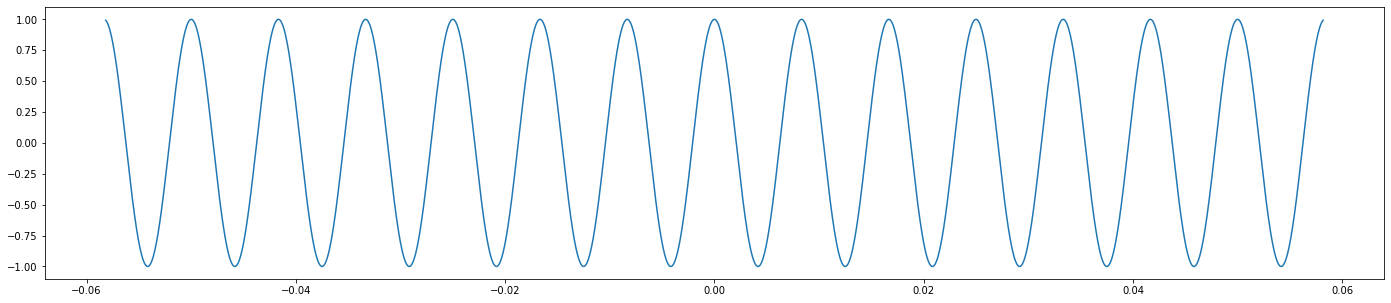

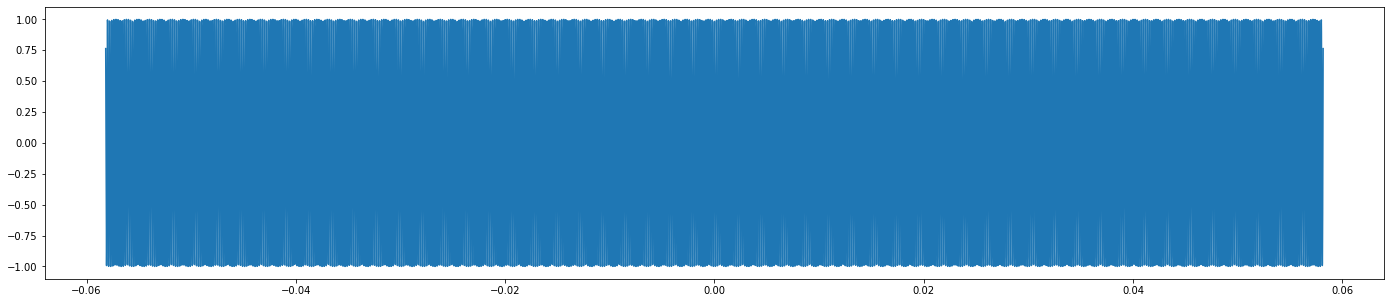

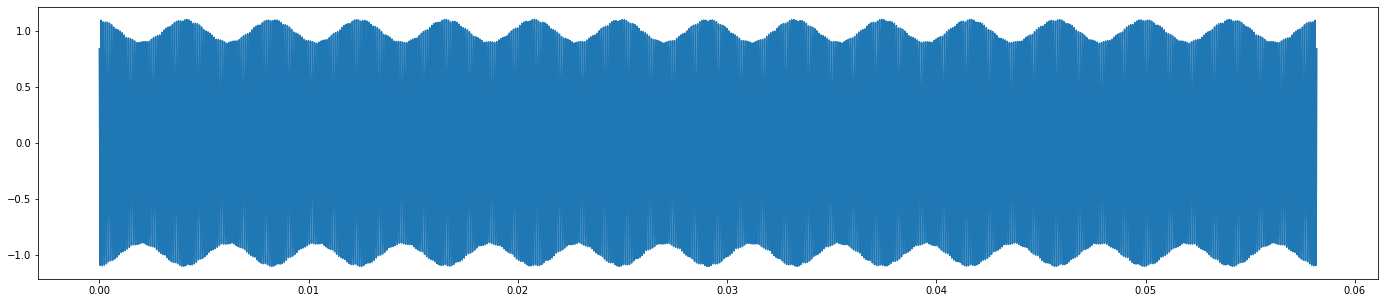

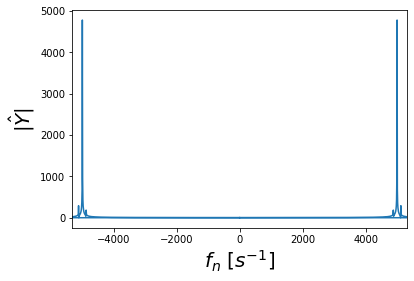

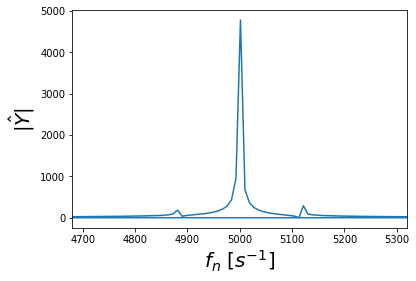

In [ ]:
factor(0.1, 120)

#####$\mu = 0.5$

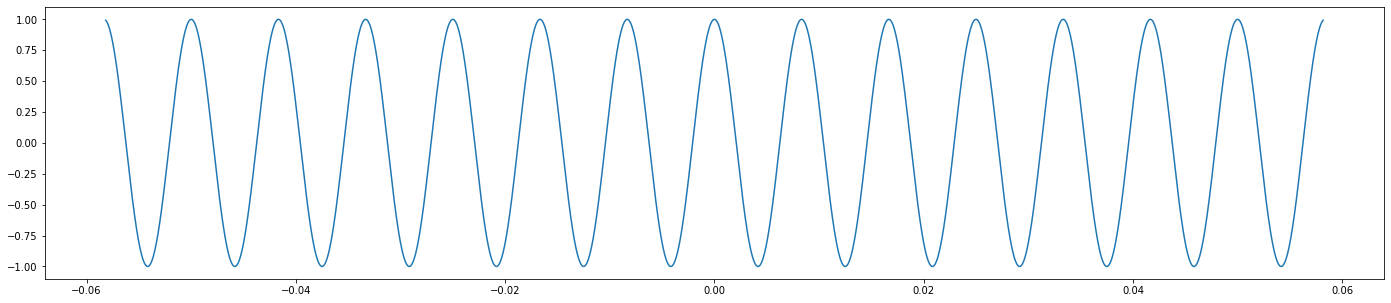

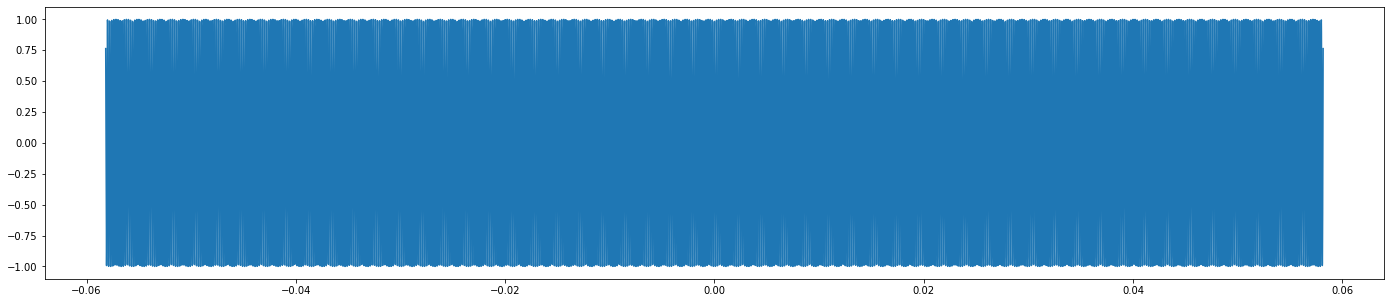

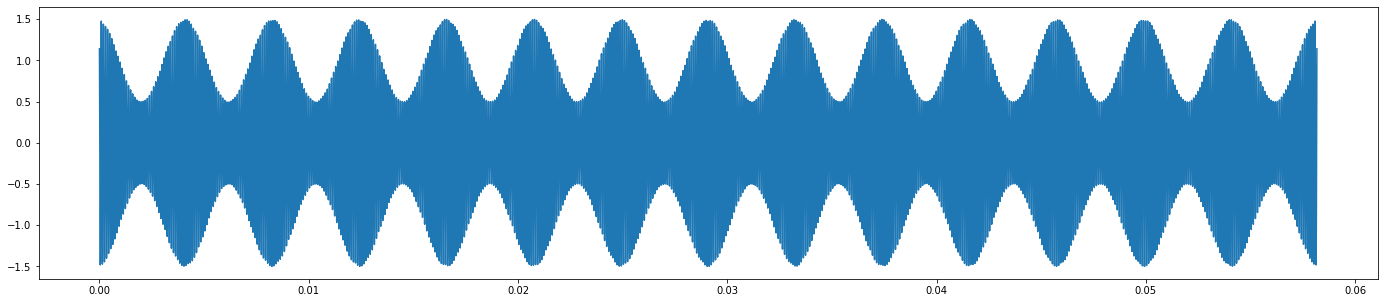

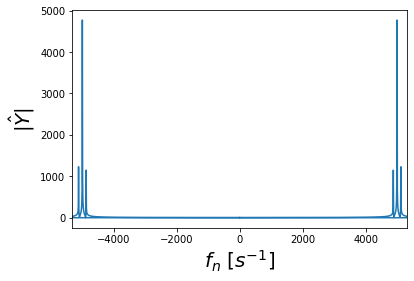

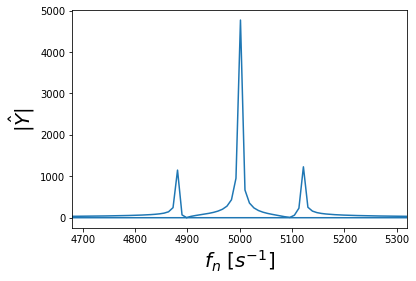

In [ ]:
factor(0.5, 120)

#####$\mu = 0.9$

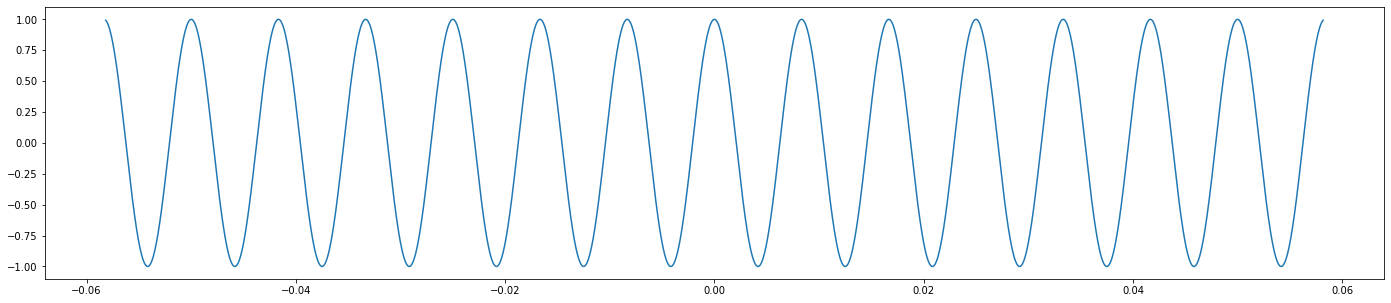

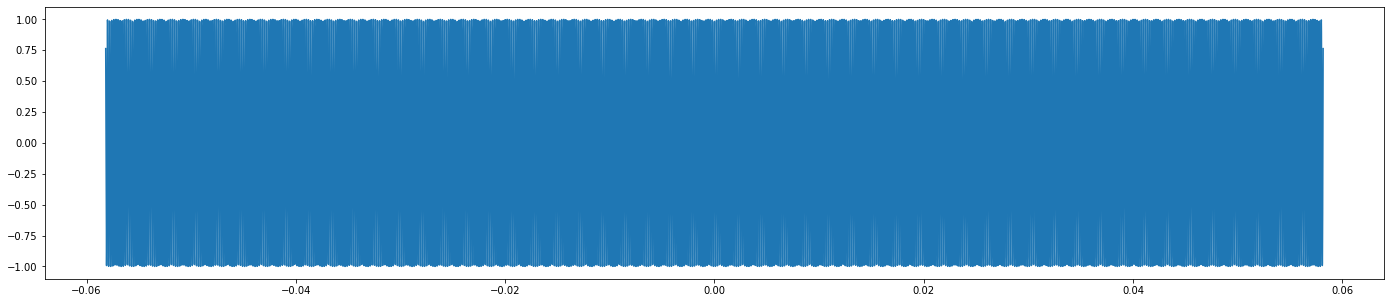

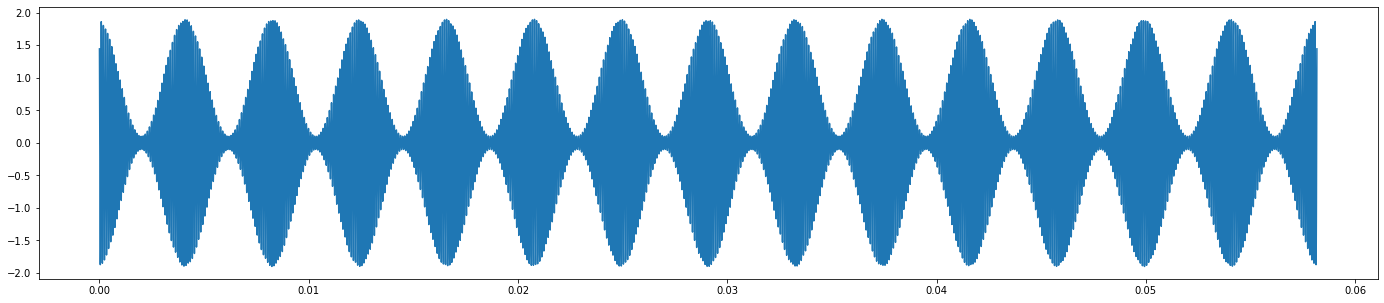

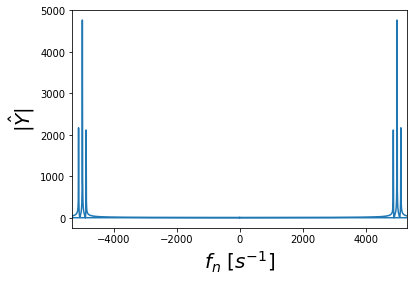

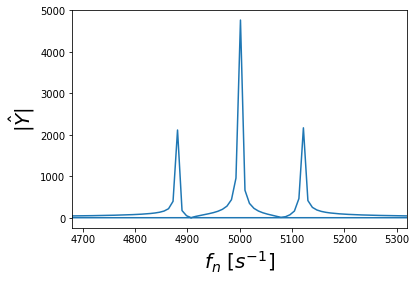

In [ ]:
factor(0.9, 120)

#####$\mu = 1$

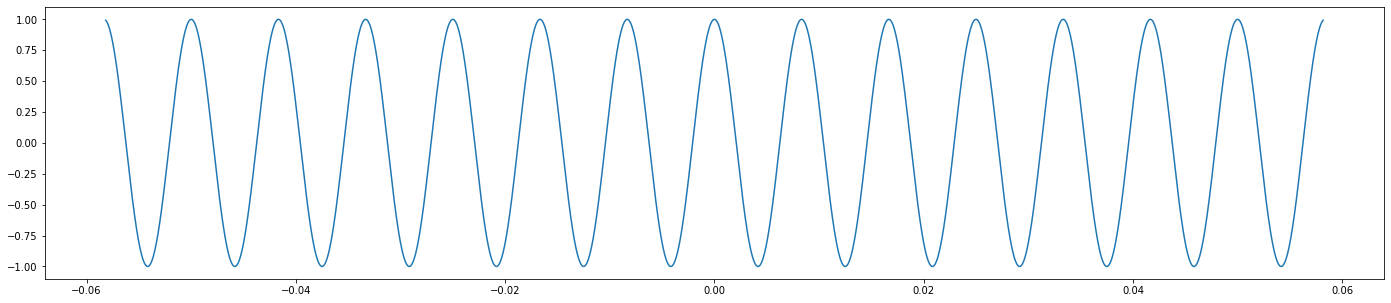

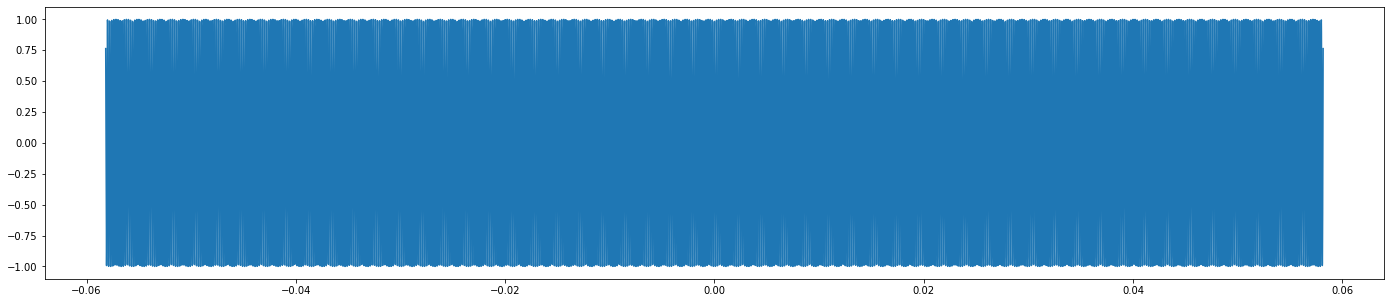

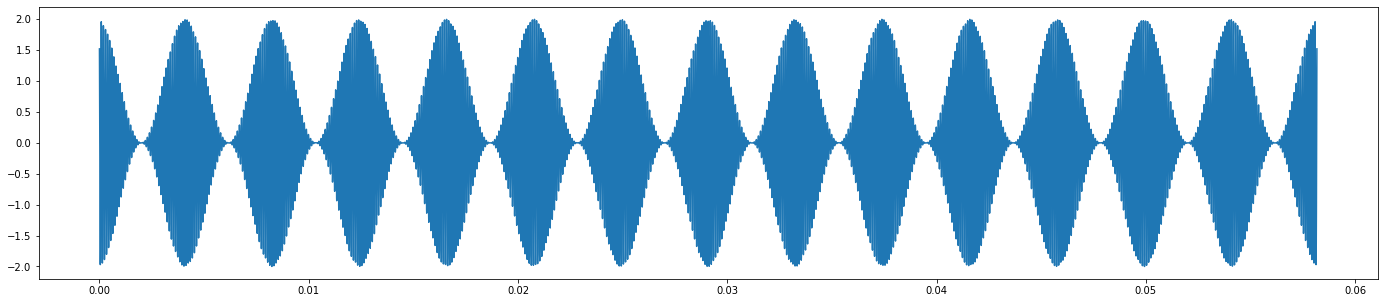

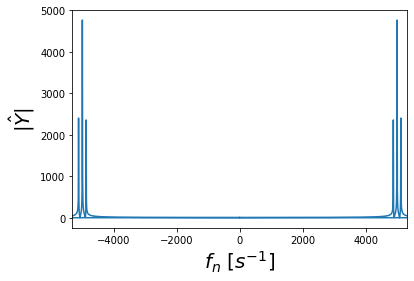

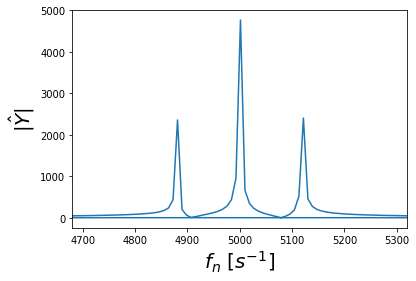

In [ ]:
factor(1, 120)

#####$\mu = 3$

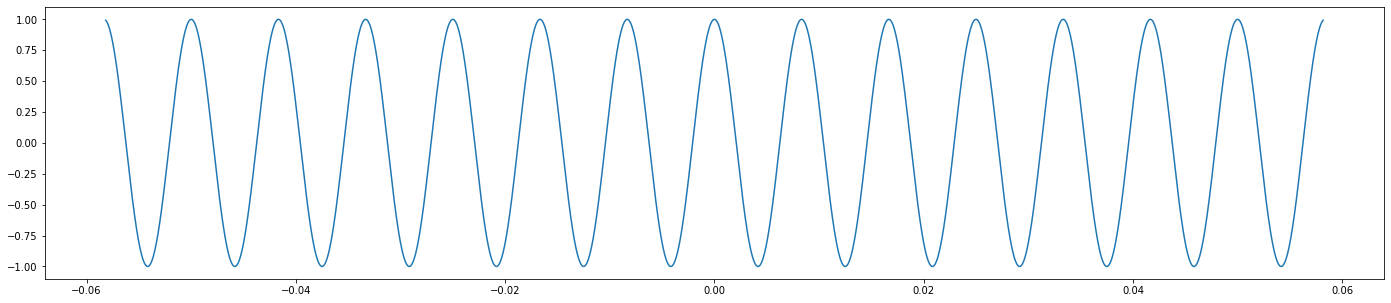

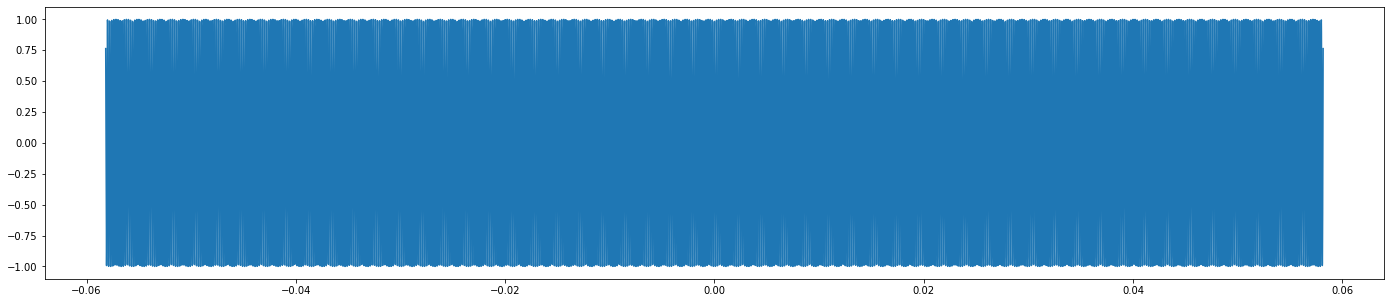

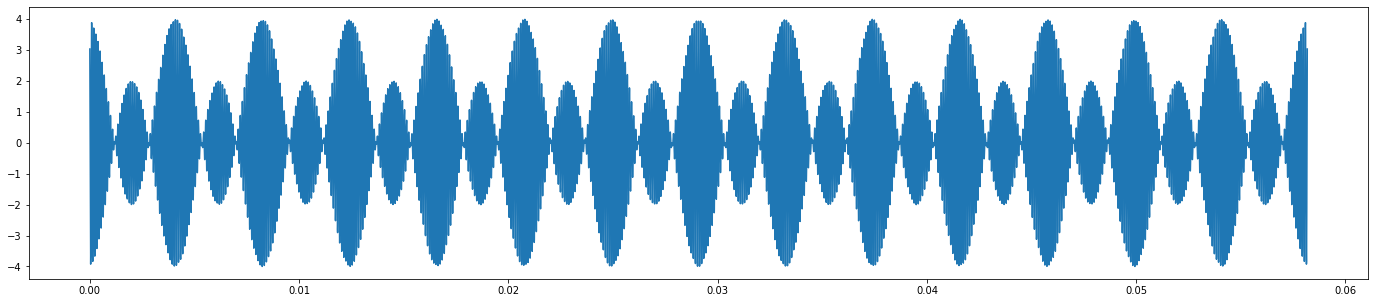

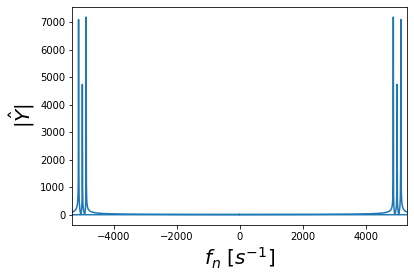

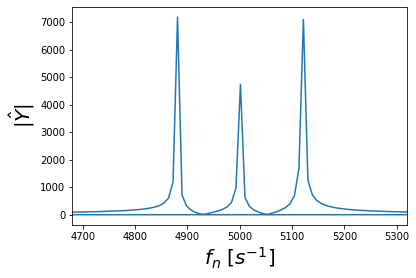

In [ ]:
factor(3, 120)

#####$\mu = 5$

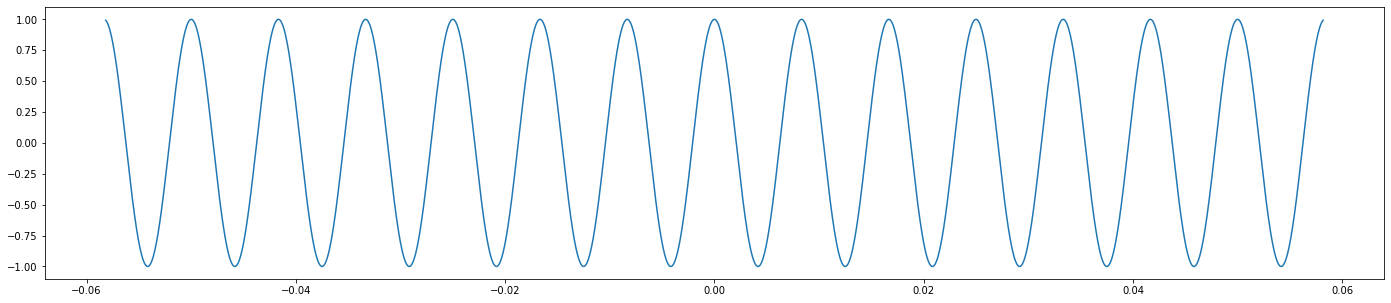

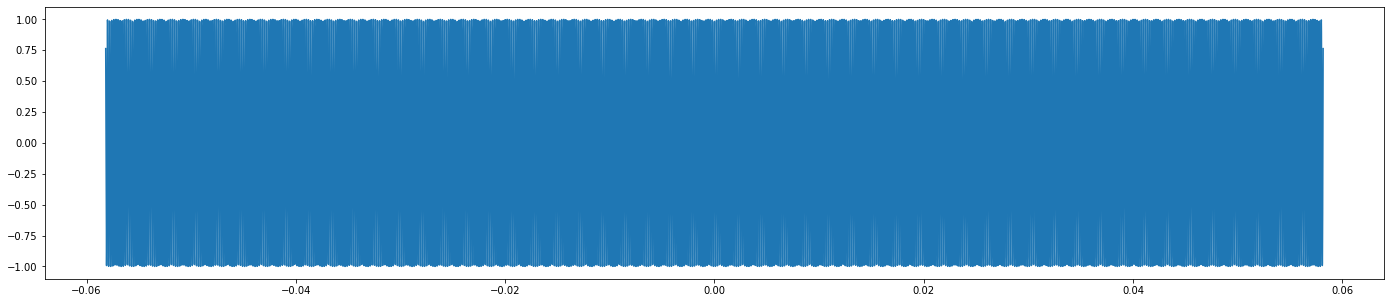

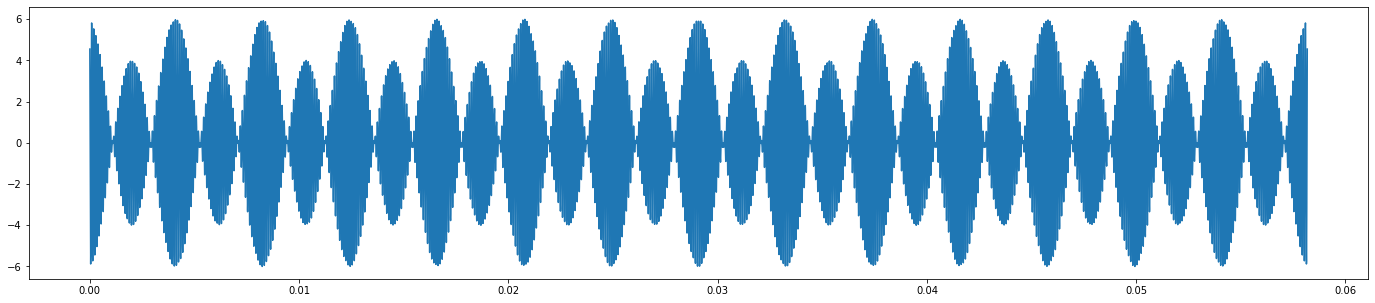

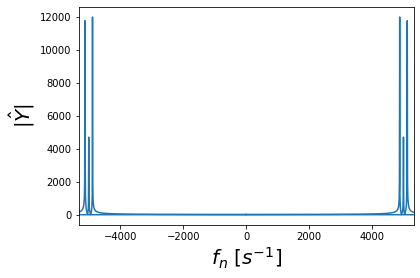

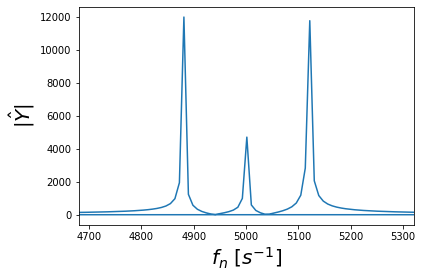

In [ ]:
factor(5, 120)

#####Análisis

Tal y como se observa en las corridas de código anteriores, es posible observar, tal y como era esperado, basandose en las demostraciones matemáticas referentes al valor de  $\mu$ que los impulsos previos al 1 tendrían un comportamiento adecuado, congruente a la forma esperada para una modulación correcta, sin embargo, al superar este valor de 1, donde se obtiene ya una sobremodulación de la señal (se usará un $\mu=5$ para explicar de mejor manera) este comportamiento cambia 

Dado que la modulación AM DSB-LC basa su demodulación en la lectura de la envolvente de la señal modulada $s(t)$ esta debe comprtarse siempre como la señal moduladora, es decir, no presentar cruces por cero. Si se observa con atención la gráfica de la señal modulada para un $\mu=0.5$ es claro que la envolvente de dicha señal nunca tiene contacto con el eje horizontal, y esto mismo ocurre con los valores menores a 1, sin embargo, si se observa la señal dada por $\mu = 3$, así como los otros valores mayores que 1, si se da ese cruce por cero. Dicho cruce afecta el proceso de demodulación de la señal, ya que en lugar de ser identificado como parte de la señal moduladora inicial, este efecto de identificará como un pequeño salto en la señal de información, no congruente con la señal que se buscaba transmitir, es por ello que se busca evitar a toda costa el cruce por cero, y esto se logra con la atenuación de la señal moduladora, facilitado por el factor $\mu$. Se conoce que este factor, para no generar una sobremodulación, requiere tener valores menores a 1 para este caso, como se indica en la sección "*Pruebas de $\mu$*" de esta forma la señal moduladora reduce su amplitud de manera que las posibilidades de cruce por cero se eliminan para la amplitud máxima de la señal moduladora, produciendo así una envolvente completamente positiva y de esa forma no existe la sobremodulación.

#####Valor de $\mu$ para evitar sobremodulación

Al inicio de la sección "*Pruebas de $\mu$*", basandose en la teoría, se determinó que la modulación no se va a dar para valores de:
$$\mu < 1$$
basandose en la teoría del curso disponible, esto se probó en las pruebas realizadas al factoe $\mu$ en la sección anterior, las cuales determinan que es correcto el análisis, de la misma forma, para dicha comprobación, a continuación se hará una prueba a un $\mu=0.9$ y a un factor $\mu=1.1$ 

######$\mu = 0.9$

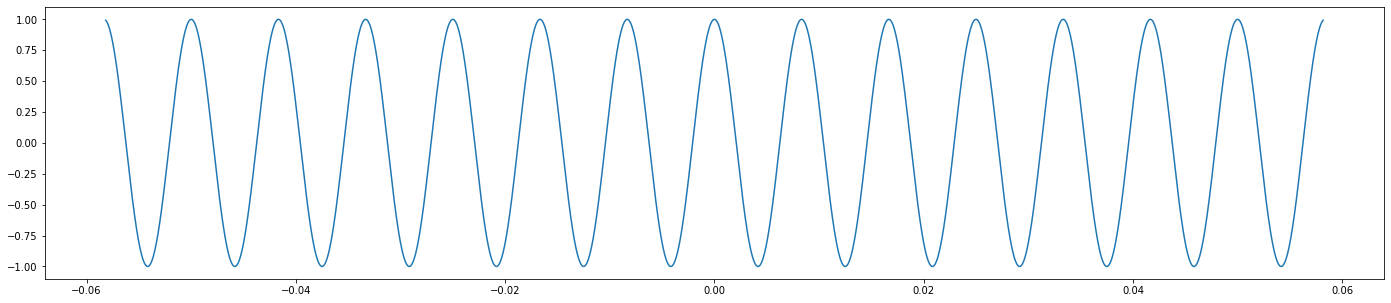

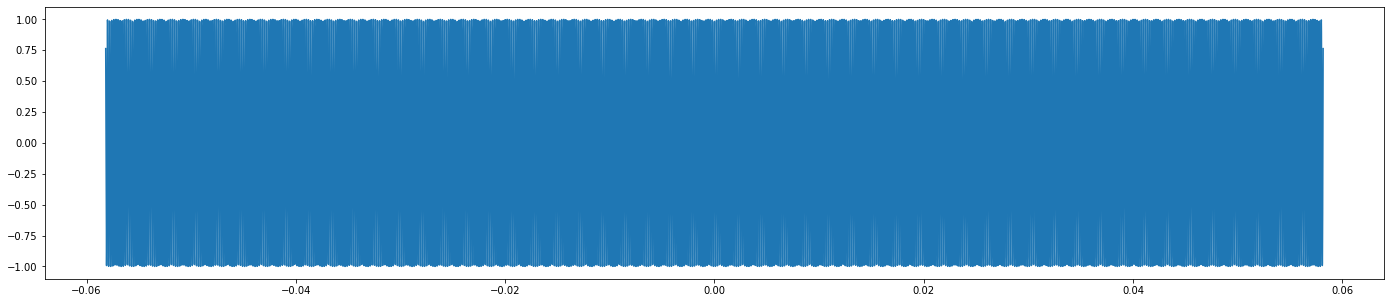

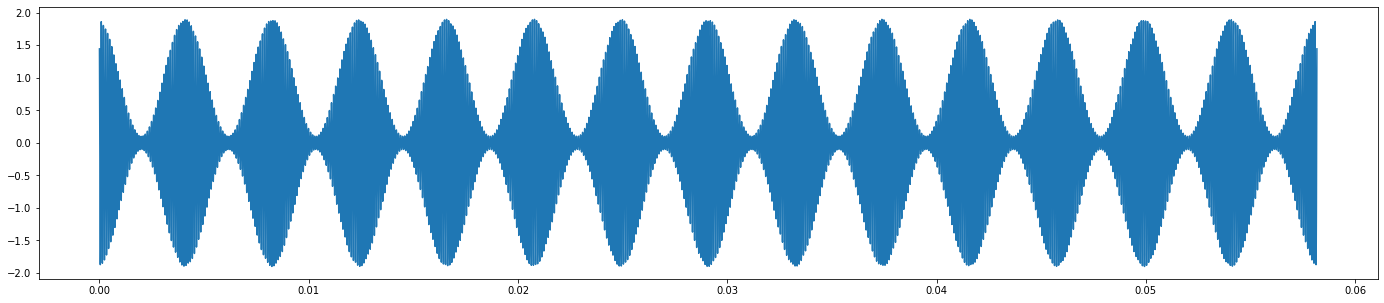

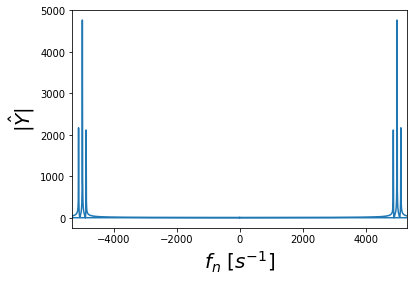

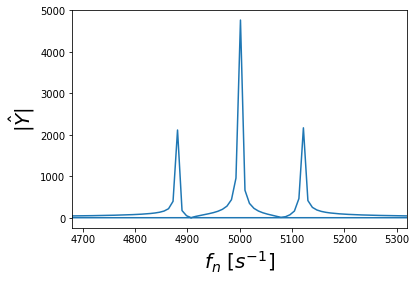

In [ ]:
factor(0.9, 120)

######$\mu = 1.1$

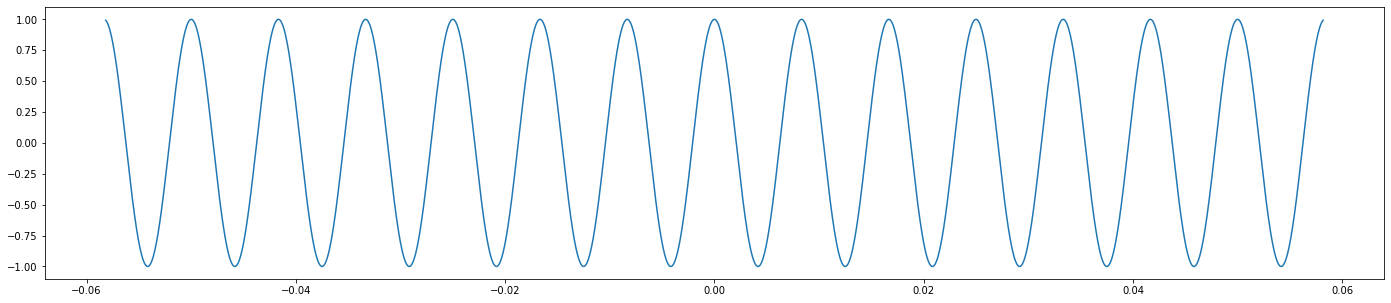

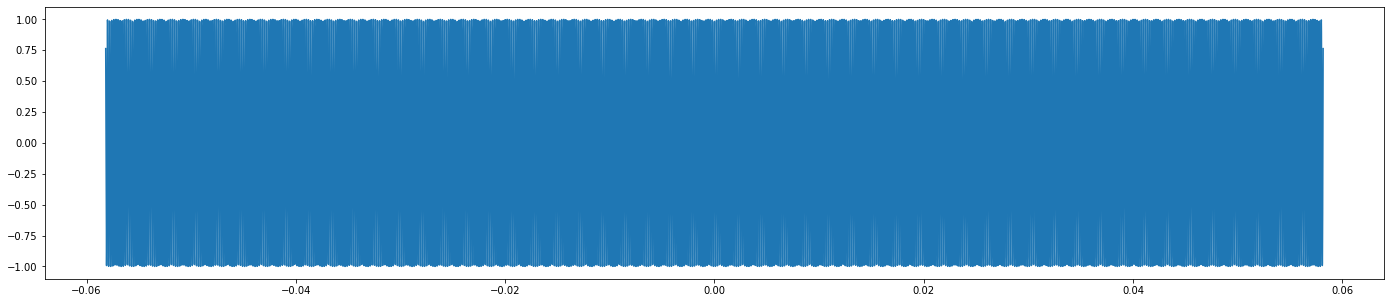

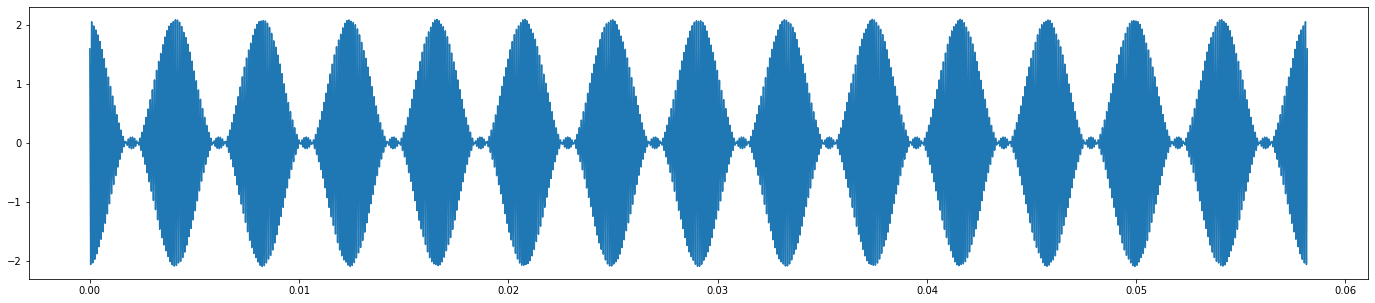

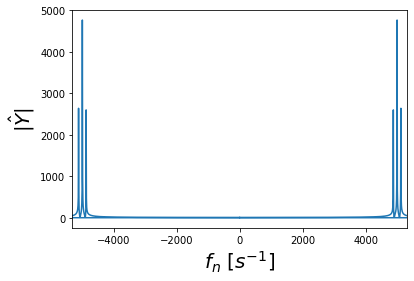

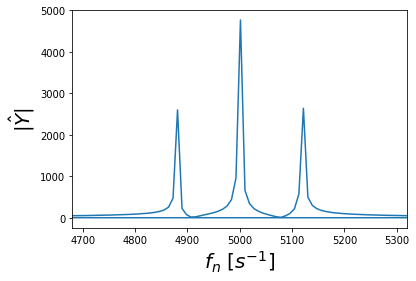

In [ ]:
factor(1.1, 120)

######Análisis

Tal y como se describió el comportamiento esperado, así se obtuvo, el efecto de la señal moduladora no puede ser visto de manera apropiada según lo interpreta el modulador, ya que el factor se plica directamente al modulador de señal, sin embargo, al modular la primer señal, la amplitud es reducida de 1 a 0.9 para el caso de $\mu=0.9$, debido a esto la envolvente de esa $s_{0.9}(t)$ resultante tiene como mínimo, en el semiplano positivo 0.05 y como máximo 0.95, es una señal positiva durante todo el tiempo, sin embargo, en el caso donde $\mu=1.1$, la señal es amplificada de manera que la resultante $s_{1.1}(t)$ tiene una envolvente positiva con un mínimo en -0.05 y un máximo en 2.05 en donde el cruce por cero está presente, por ende, la envolvente positiva, en lugar de considerar el cruce por cero como parte de ella, considerará la señal de la envolvente negativa que cruza al semiplano positivo, distorsionando la señal.